# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# added:
from sklearn.metrics import classification_report, make_scorer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

/Users/adi/Downloads/assignment5-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

This function takes the text and removes numbers, leading and trailing spaces and replaces multiple whitespaces with a single space.

In [10]:
def handle_text(text):
    text = re.sub(r'\d', '', text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

This function takes a hebrew text and returns a list of tokens using the hebrew tokenizer.

In [11]:
def my_tokenizer(raw_text):
    token = ht.tokenize(raw_text)
    tokens_list = list(filter(lambda x: (x[0] == 'HEBREW'),token))
    tokens_list = [tuple[1] for tuple in tokens_list]
    return tokens_list

The gender column needs to become numeric in order to process it with a ML model, so I added a new column named 'gender_num'.
Also used the function handle text for preproccesing.

In [12]:
# Add as many code cells as you need
# YOUR CODE HERE

def handle_train(df):
    # preprocess the text
    df['story'] = df ['story'].apply(handle_text)
    
    # fit and transform the gender column to numeric values
    le = LabelEncoder()
    df['gender_num'] = le.fit_transform(df['gender'])
    
    # got X_train and y_train
    X_train = df.story
    y_train = df.gender_num
    
    return X_train, y_train
    

First I wanted to try the models with the default values and only using vectorizer with a simple tokenizer.

In [33]:
def perform_simple_prediction(models_list, X, y):
    # Define the scoring metric - f1_macro as defined in the assignment
    scoring = make_scorer(f1_score, average='macro')
    
    # Define the vectorizers to try without parameters 
    vectorizers = [
        ('tfidf', TfidfVectorizer(tokenizer=my_tokenizer)),
        ('count', CountVectorizer(tokenizer=my_tokenizer))
    ]
    for model_name, model in models_list.items():
        for vec_name, vectorizer in vectorizers:
            # Create the feature vectors with the vectorizer
            X_features = vectorizer.fit_transform(X)
            
            model.fit(X_features, y)
            
            # Calculate the mean F1-macro score from cross-validation scores
            cv_scores = cross_val_score(model, X_features, y, cv=10, scoring=scoring)
            mean_score = cv_scores.mean()
            
            print(f"Model: {model_name}, Vectorizer: {vec_name}")
            print("Mean F1-macro Score:", mean_score)
            print("-------------------------------------------")

In [34]:
models_list = {
    'linearSVC':LinearSVC(),
    'sgd': SGDClassifier(),
    'neuralNetwork':MLPClassifier(),
    'perceptron':Perceptron()
}
X_train, y_train = handle_train(df_train)
perform_simple_prediction(models_list, X_train, y_train)

Model: linearSVC, Vectorizer: tfidf
Mean F1-macro Score: 0.5172040607797049
-------------------------------------------
Model: linearSVC, Vectorizer: count
Mean F1-macro Score: 0.6807491133071919
-------------------------------------------
Model: sgd, Vectorizer: tfidf
Mean F1-macro Score: 0.6055382908898974
-------------------------------------------
Model: sgd, Vectorizer: count
Mean F1-macro Score: 0.6507572160552088
-------------------------------------------
Model: neuralNetwork, Vectorizer: tfidf
Mean F1-macro Score: 0.5380789701232455
-------------------------------------------
Model: neuralNetwork, Vectorizer: count
Mean F1-macro Score: 0.5711470722558112
-------------------------------------------
Model: perceptron, Vectorizer: tfidf
Mean F1-macro Score: 0.6463593076340446
-------------------------------------------
Model: perceptron, Vectorizer: count
Mean F1-macro Score: 0.6603325055499101
-------------------------------------------


Then I wanted to try with normalizing the data.

In [35]:
def perform_prediction_normalizing(models_list, X, y):
    # Define the scoring metric - f1_macro as defined in the assignment
    scoring = make_scorer(f1_score, average='macro')
    
    # Define the vectorizers to try without parameters 
    vectorizers = [
        ('tfidf', TfidfVectorizer(tokenizer=my_tokenizer)),
        ('count', CountVectorizer(tokenizer=my_tokenizer))
    ]
    for model_name, model in models_list.items():
        for vec_name, vectorizer in vectorizers:
            # Create the feature vectors with the vectorizer
            X_features = vectorizer.fit_transform(X)
            
            # Apply normalization to the feature vectors
            norm = preprocessing.Normalizer(norm='l2')
            X_features = norm.transform(X_features)
            
            model.fit(X_features, y)
            
            # Calculate the mean F1-macro score from cross-validation scores
            cv_scores = cross_val_score(model, X_features, y, cv=10, scoring=scoring)
            mean_score = cv_scores.mean()
            
            print(f"Model: {model_name}, Vectorizer: {vec_name}")
            print("Mean F1-macro Score:", mean_score)
            print("-------------------------------------------")

In [36]:
models_list = {
    'linearSVC':LinearSVC(),
    'sgd': SGDClassifier(),
    'neuralNetwork':MLPClassifier(),
    'perceptron':Perceptron()
}
X_train, y_train = handle_train(df_train)
perform_prediction_normalizing(models_list, X_train, y_train)

Model: linearSVC, Vectorizer: tfidf
Mean F1-macro Score: 0.5172040607797049
-------------------------------------------
Model: linearSVC, Vectorizer: count
Mean F1-macro Score: 0.5963274583191005
-------------------------------------------
Model: sgd, Vectorizer: tfidf
Mean F1-macro Score: 0.6039466869915285
-------------------------------------------
Model: sgd, Vectorizer: count
Mean F1-macro Score: 0.6582065183853958
-------------------------------------------
Model: neuralNetwork, Vectorizer: tfidf
Mean F1-macro Score: 0.539164367284224
-------------------------------------------
Model: neuralNetwork, Vectorizer: count
Mean F1-macro Score: 0.5557472744448927
-------------------------------------------
Model: perceptron, Vectorizer: tfidf
Mean F1-macro Score: 0.6463593076340446
-------------------------------------------
Model: perceptron, Vectorizer: count
Mean F1-macro Score: 0.6157001778567275
-------------------------------------------


Then I wanted to try with scaling.

In [37]:
def perform_prediction_normalizing_scaling(models_list, X, y):
    # Define the scoring metric - f1_macro as defined in the assignment
    scoring = make_scorer(f1_score, average='macro')
    
    # Define the vectorizers to try without parameters 
    vectorizers = [
        ('tfidf', TfidfVectorizer(tokenizer=my_tokenizer)),
        ('count', CountVectorizer(tokenizer=my_tokenizer))
    ]
    for model_name, model in models_list.items():
        for vec_name, vectorizer in vectorizers:
            # Create the feature vectors with the vectorizer
            X_features = vectorizer.fit_transform(X)
            
            # Apply normalization to the feature vectors
            norm = preprocessing.Normalizer(norm='l2')
            X_features = norm.transform(X_features)
            
            # Scale the features with StandardScaler
            scaler = StandardScaler(with_mean=False)
            X_features = scaler.fit_transform(X_features)
            
            model.fit(X_features, y)
            
            # Calculate the mean F1-macro score from cross-validation scores
            cv_scores = cross_val_score(model, X_features, y, cv=10, scoring=scoring)
            mean_score = cv_scores.mean()
            
            print(f"Model: {model_name}, Vectorizer: {vec_name}")
            print("Mean F1-macro Score:", mean_score)
            print("-------------------------------------------")

In [38]:
models_list = {
    'linearSVC':LinearSVC(),
    'sgd': SGDClassifier(),
    'neuralNetwork':MLPClassifier(),
    'perceptron':Perceptron()
}
X_train, y_train = handle_train(df_train)
perform_prediction_normalizing_scaling(models_list, X_train, y_train)

Model: linearSVC, Vectorizer: tfidf
Mean F1-macro Score: 0.4870485971329684
-------------------------------------------
Model: linearSVC, Vectorizer: count
Mean F1-macro Score: 0.4870485971329684
-------------------------------------------
Model: sgd, Vectorizer: tfidf
Mean F1-macro Score: 0.6212006028260516
-------------------------------------------
Model: sgd, Vectorizer: count
Mean F1-macro Score: 0.6075454932122977
-------------------------------------------
Model: neuralNetwork, Vectorizer: tfidf
Mean F1-macro Score: 0.6282657345470678
-------------------------------------------
Model: neuralNetwork, Vectorizer: count
Mean F1-macro Score: 0.5480836626579164
-------------------------------------------
Model: perceptron, Vectorizer: tfidf
Mean F1-macro Score: 0.6276585458543527
-------------------------------------------
Model: perceptron, Vectorizer: count
Mean F1-macro Score: 0.6267061405664227
-------------------------------------------


This function performs a grid search to find the best combination of model, vectorizer, normalization,
and parameters based on the F1-macro score. It uses cross-validation to evaluate the performance of each
combination. The best model is then fitted on the entire dataset, and cross-validation is performed again
to obtain the final evaluation scores. The function returns the best model, vectorizer, normalization, and
scaler, which can be used for making predictions on the test set.

In [17]:
def perform_grid_search(models_list, params_list, X, y):
    # Define the scoring metric - f1_macro as defined in the assignment
    scoring = make_scorer(f1_score, average='macro')

    best_mean_score = 0
    best_model = None
    best_vectorizer = None
    best_normalization = None
    best_params = None

    # Define the vectorizers to try with parameters 
    vectorizers = [
        ('tfidf', TfidfVectorizer(ngram_range=(1, 1), min_df=10, max_df=100, max_features=10000, tokenizer=my_tokenizer)),
        ('count', CountVectorizer(ngram_range=(1, 1), min_df=9, max_df=100, max_features=5000, tokenizer=my_tokenizer))
    ]

    # Define the normalization method to try
    norms = ['l1', 'l2']

    # Go through all the models, normalization methods and possible parameters to find the best combination
    for model_name, model in models_list.items():
        # Parameters to try for the model
        params = params_list[model_name]
        for vec_name, vectorizer in vectorizers:
            for current_norm in norms:
                # Create the feature vectors with the vectorizer
                X_features = vectorizer.fit_transform(X)

                # Apply normalization to the feature vectors
                norm = preprocessing.Normalizer(norm=current_norm)
                X_features = norm.transform(X_features)

                # Scale the features with StandardScaler
                scaler = StandardScaler(with_mean=False)
                X_features = scaler.fit_transform(X_features)

                # Create the grid search object
                grid_search = GridSearchCV(model, params, cv=10, scoring=scoring)

                # Fit the grid search to the processed data
                grid_search.fit(X_features, y)

                # Calculate the mean F1-macro score from cross-validation scores
                cv_scores = cross_val_score(grid_search.best_estimator_, X_features, y, cv=10, scoring=scoring)
                mean_score = cv_scores.mean()

                # Check if it's better than the current best model and save the info if it is
                if mean_score > best_mean_score:
                    best_mean_score = mean_score
                    best_model = model_name
                    best_vectorizer = vec_name
                    best_normalization = current_norm
                    best_params = grid_search.best_params_

                # Print the best parameters and score for the current model
                print(f"Model: {model_name}, Vectorizer: {vec_name}, Normalizer: {current_norm}")
                print("Best Parameters:", grid_search.best_params_)
                print("Mean F1-macro Score:", mean_score)
                print("-------------------------------------------")

    # Use the best model, vectorizer, normalization, and parameters for final fitting
    best_model_obj = models_list[best_model]
    best_vectorizer_obj = [vec[1] for vec in vectorizers if vec[0] == best_vectorizer][0]
    best_normalization_obj = best_normalization

    # Create the feature vectors with the best vectorizer
    X_features = best_vectorizer_obj.fit_transform(X)
    # Apply normalization to the feature vectors
    X_features = preprocessing.normalize(X_features, norm=best_normalization_obj)
    # Scale the features
    scale = StandardScaler(with_mean=False)
    X_features = scale.fit_transform(X_features)

    # Fit the best model on the entire dataset
    best_model_obj.fit(X_features, y)

    # Print the best model info
    print("Best Model:")
    print("Model:", best_model)
    print("Vectorizer:", best_vectorizer)
    print("Normalization:", best_normalization)
    print("Best Mean F1-macro Score on Cross-Validation:", best_mean_score)
    print("Best Parameters:", best_params)

    # Return all that is needed to do prediction on the test set
    return best_model_obj, best_vectorizer_obj, best_normalization_obj, scale


In [16]:
models_list = {
    'linearSVC':LinearSVC(),
    'sgd': SGDClassifier(),
    'neuralNetwork':MLPClassifier(),
    'perceptron':Perceptron()
}

params_list = {
    'linearSVC': {'C': [0.1, 1, 10]},
    'sgd': {'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet']
    },
    'neuralNetwork': {
        'hidden_layer_sizes': [(100,), (100, 50, 25)],
        'activation': ['relu', 'logistic', 'tanh'],
        'solver': ['adam', 'sgd'],
        'max_iter': [100, 200, 500]
    },
    'perceptron': {
        'alpha': [0.1, 0.01, 0.001],
        'penalty': [None, 'l2', 'l1', 'elasticnet'],
        'eta0': [0.1, 0.01, 0.001]
    }
}

Do preprocessing on the data and start grid search. The function return the best model, normalizer and vectorizer and the scaler that was used. Then this will be used to do prediction on test set.

In [18]:
X_train, y_train = handle_train(df_train)
best_model, best_vectorizer, best_normalization, scaler = perform_grid_search(models_list, params_list, X_train, y_train)

Model: linearSVC, Vectorizer: tfidf, Normalizer: l1
Best Parameters: {'C': 0.1}
Mean F1-macro Score: 0.6504050840414332
-------------------------------------------
Model: linearSVC, Vectorizer: tfidf, Normalizer: l2
Best Parameters: {'C': 10}
Mean F1-macro Score: 0.6598949762923876
-------------------------------------------
Model: linearSVC, Vectorizer: count, Normalizer: l1
Best Parameters: {'C': 0.1}
Mean F1-macro Score: 0.6576900637952947
-------------------------------------------
Model: linearSVC, Vectorizer: count, Normalizer: l2
Best Parameters: {'C': 0.1}
Mean F1-macro Score: 0.6580873788559604
-------------------------------------------
Model: sgd, Vectorizer: tfidf, Normalizer: l1
Best Parameters: {'alpha': 0.0001, 'max_iter': 3000, 'penalty': 'l2'}
Mean F1-macro Score: 0.642455510980789
-------------------------------------------
Model: sgd, Vectorizer: tfidf, Normalizer: l2
Best Parameters: {'alpha': 0.0001, 'max_iter': 3000, 'penalty': 'l2'}
Mean F1-macro Score: 0.6484768

In conclusion, the best model I got was- LinearSVC with count vectorizer:

In [49]:
X_train, y_train = handle_train(df_train)
scoring = make_scorer(f1_score, average='macro')

best_model = LinearSVC()
vectorizer = CountVectorizer(tokenizer= my_tokenizer, max_features=10000)
# Create the feature vectors with the vectorizer
X_features = vectorizer.fit_transform(X_train)
            
best_model.fit(X_features, y_train)
            
# Calculate the mean F1-macro score from cross-validation scores
cv_scores = cross_val_score(best_model, X_features, y_train, cv=10, scoring=scoring)
mean_score = cv_scores.mean()
print("f1_macro mean:", mean_score)

LinearSVC()

f1_macro mean: 0.6845119071830548


Here is the confusion matrix for the training set:

In [54]:
predicted_train = best_model.predict(X_features)
pd.DataFrame(confusion_matrix(y_pred = predicted_train, y_true = y_train), index = ['Female', 'Male'], columns = ['Female', 'Male'])

,Female,Male
Female,177,1
Male,0,575


Preprocess the test set stories. Then do vectorizing, normalizing and scaling. 

In [50]:
df_test['story'] = df_test['story'].apply(handle_text)

X_test = df_test.story

X_test_features = vectorizer.transform(X_test)
#X_test_normalized = preprocessing.normalize(X_test_features, norm=best_normalization)
#X_test_scaled = scaler.transform(X_test_normalized)

# Predict labels for the test set
predicted_test = best_model.predict(X_test_features)

Predict:

In [51]:
predicted_categories = ['m' if pred == 1 else 'f' for pred in predicted_test]

# Create a DataFrame with the test example IDs and predicted categories
df_predicted = pd.DataFrame({'test_example_id': df_test['test_example_id'],
                               'predicted_category': predicted_categories})
df_predicted.head(5)

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f


In [52]:
df_predicted.tail(5)

,test_example_id,predicted_category
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


I wanted to see that the percentage of men is close to what it was in the training set.

m    249
f     74
Name: predicted_category, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe56c033610>,
 [Text(-0.8271706738210322, 0.7251128714693044, 'm'),
  Text(0.8271706059310621, -0.7251129489146086, 'f')],
 [Text(-0.4511840039023811, 0.3955161117105296, '77.1%'),
  Text(0.4511839668714883, -0.3955161539534228, '22.9%')])

(-1.105256255561613,
 1.1002502978838864,
 -1.1050675889958914,
 1.1045804475229066)

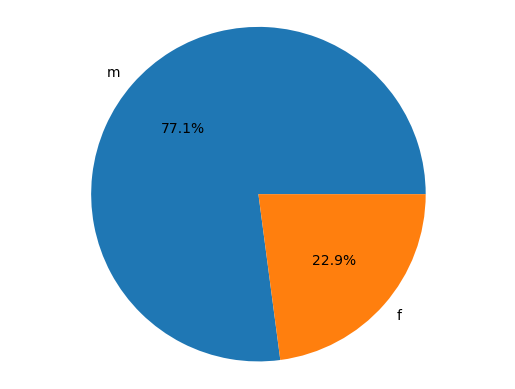

In [53]:
# visualize
gender_counts = df_predicted['predicted_category'].value_counts()
gender_counts
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [55]:
df_predicted.to_csv('classification_results.csv',index=False)